**Objective:** Analyze the cleaned sales dataset to extract key insights:
- Total revenue per product
- Top 5 selling products
- Monthly revenue trends
- Sales performance across Regions
- Best-performing sales representative


In [1]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\navya\OneDrive\Documents\Sales_Analysis_Project\Data\sales_data_cleaned.csv")
df1.head()


,Date,Customer_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Region,Sales_Rep,Revenue
0,2023-11-24,CUST1070,Stationery,Pen,17,495,North,Bob,8415
1,2023-02-27,CUST1021,Clothing,Pen,1,544,South,Alice,544
2,2023-01-13,CUST1033,Electronics,Laptop,16,1356,South,Alice,21696
3,2023-05-21,CUST1067,Stationery,T-Shirt,12,175,West,Charlie,2100
4,2023-05-06,CUST1077,Stationery,Phone,19,364,South,Ethan,6916


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              195 non-null    object
 1   Customer_ID       195 non-null    object
 2   Product_Category  195 non-null    object
 3   Product_Name      195 non-null    object
 4   Units_Sold        195 non-null    int64 
 5   Unit_Price        195 non-null    int64 
 6   Region            195 non-null    object
 7   Sales_Rep         195 non-null    object
 8   Revenue           195 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 13.8+ KB


### Total Revenue per product

In [3]:
df1["Product_Name"].unique()

array(['Pen', 'Laptop', 'T-Shirt', 'Phone', 'Table', 'Notebook', 'Chair'],
      dtype=object)

In [4]:
product_revenue=df1.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False)
product_revenue


Product_Name
Laptop      387917
T-Shirt     382374
Notebook    335357
Table       294298
Chair       248958
Pen         217428
Phone       191882
Name: Revenue, dtype: int64

**Insight:** Laptops and T-Shirts are driving the most revenue, indicating strong demand and higher price points.

### Top 5 selling products based on units sold ###

In [5]:
Top_selling_prod=df1.groupby("Product_Name")["Units_Sold"].sum().sort_values(ascending=False).head(5)
print("Top 5 selling products",Top_selling_prod)

Top 5 selling products Product_Name
T-Shirt     360
Laptop      343
Notebook    322
Table       284
Pen         210
Name: Units_Sold, dtype: int64


**Insight:** T-Shirts sell in the highest quantity, showing popularity among customers, while revenue may differ due to unit price variations.

### Monthly Revenue Trend ###

In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1["Yearmonth"]=df1["Date"].dt.to_period('M')
monthly_revenue=df1.groupby('Yearmonth')["Revenue"].sum().reset_index()
monthly_revenue['Yearmonth'] = monthly_revenue['Yearmonth'].astype(str)



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

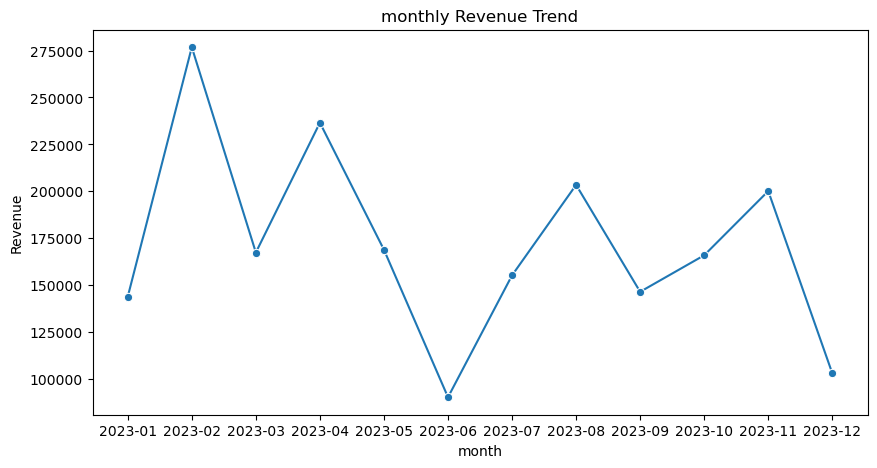

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue,x='Yearmonth',y='Revenue',marker='o')
plt.title("monthly Revenue Trend")
plt.xlabel("month")
plt.ylabel("Revenue")
plt.show()
             

**insight:** — The chart shows monthly revenue fluctuations for 2023, highlighting peaks in February and dips around May and December, indicating possible seasonal variations in sales.


### Sales performance across Regions ###

In [9]:
region_revenue=df1.groupby('Region')["Revenue"].sum().sort_values(ascending=False)
region_revenue

Region
South    590340
North    587010
East     484350
West     396514
Name: Revenue, dtype: int64

**Insight:** The South and North regions generate the highest revenue, indicating strong market performance there.  
The East and West regions contribute less, suggesting potential opportunities to increase sales through targeted marketing or promotions.

### Best performing Sales Representative ###

In [10]:
sales_rep_performance=df1.groupby("Sales_Rep")["Revenue"].sum().sort_values(ascending=False)
sales_rep_performance

Sales_Rep
Alice      489749
Charlie    461833
Ethan      421270
Diana      397523
Bob        287839
Name: Revenue, dtype: int64

**Insight:** Alice and Charlie are the top performers, contributing the most to overall sales.  
Recognizing high performers and mentoring lower performers like Bob can help improve overall team efficiency and revenue.